In [1]:
# from the confusion matrix given, the following are the values of tp, fp, fn, and tn
tp = 255
fp = 1380
fn = 45
tn = 20
precision = tp /(tp + fp) # precision
recall = tp/(tp + fn) # recall
f1_score = 2 * ((precision*recall)/ (precision + recall)) #f1_score 
print('F1 Score of Classifier =', round(f1_score, 4))

F1 Score of Classifier = 0.2636


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [8]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [9]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

<AxesSubplot:xlabel='stabf', ylabel='count'>

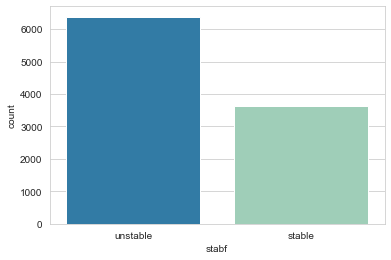

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='stabf',data=df, palette='YlGnBu_r')

In [11]:
df[df["stab"] <= 0]["stabf"].value_counts()

stable    3620
Name: stabf, dtype: int64

In [12]:
df[df["stab"] > 0]["stabf"].value_counts()

unstable    6380
Name: stabf, dtype: int64

In [13]:
df1 = df.drop(columns="stab")

In [14]:
df1.sample(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
7157,7.739207,3.645356,1.425817,2.367390,5.106400,-1.599871,-1.774526,-1.732003,0.532775,0.703175,0.562413,0.783524,stable
8286,9.175341,0.982922,1.689861,2.016734,4.567008,-1.554082,-1.478051,-1.534876,0.935866,0.619022,0.837474,0.291202,stable


In [15]:
df1.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [16]:
df1.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [18]:
X = df1.drop(columns="stabf")
y = df1["stabf"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=1) 
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [20]:
# converting the stabf column into 0's and 1's using labelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [22]:
sc = StandardScaler()
sc_xtrain = sc.fit_transform(x_train)
sc_xtrain = pd.DataFrame(sc_xtrain, columns=x_train.columns)

x_test = x_test.reset_index(drop= True) 
sc_xtest = sc.fit_transform(x_test)
sc_xtest = pd.DataFrame(sc_xtest, columns=x_test.columns)

In [23]:
sc_xtrain

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [24]:
sc_xtest.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608


In [25]:
 sc_xtrain.shape

(8000, 12)

In [26]:
sc_xtest.shape

(2000, 12)

In [27]:
#pip install xgboost

In [28]:
#pip install lightgbm

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import  recall_score, accuracy_score, precision_score, f1_score

In [30]:
# Random Forest Classifier

In [31]:
randomF = RandomForestClassifier(random_state=1)
randomF.fit(sc_xtrain, y_train)

Rf_Pred = randomF.predict(sc_xtest)
print(classification_report(Rf_Pred, y_test))
print('Accuracy score for Random Forest =', round(accuracy_score(y_test, Rf_Pred), 5))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       680
           1       0.96      0.93      0.94      1320

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Accuracy score for Random Forest = 0.928


In [32]:
# XGBoost

In [33]:
xgb_clf = xgb.XGBClassifier(random_state=1)
xgb_clf.fit(sc_xtrain, y_train)

xgb_Pred = xgb_clf.predict(sc_xtest)
print(classification_report(xgb_Pred, y_test))
print('Accuracy score for XGBClassifier =', round(accuracy_score(y_test, xgb_Pred),4))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       690
           1       0.97      0.95      0.96      1310

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

Accuracy score for XGBClassifier = 0.946


In [34]:
# LGBM Classifier

In [35]:
lgbm_clf = lgb.LGBMClassifier(random_state=1)
lgbm_clf.fit(sc_xtrain, y_train)

lgbm_Pred = lgbm_clf.predict(sc_xtest)
print(classification_report(lgbm_Pred, y_test))
print('Accuracy score for LGBM Classifier =', round(accuracy_score(lgbm_Pred, y_test),4))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       687
           1       0.96      0.94      0.95      1313

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

Accuracy score for LGBM Classifier = 0.9365


In [36]:
# Extra Trees Classifier

In [37]:
Extra = ExtraTreesClassifier(random_state=1)
Extra.fit(sc_xtrain, y_train)

Extra_Pred = Extra.predict(sc_xtest)
print(classification_report(Extra_Pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       640
           1       0.97      0.92      0.94      1360

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits= 5, shuffle= True , random_state= 1) 
 
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
rsv = RandomizedSearchCV(Extra, param_distributions=hyperparameter_grid, cv=skf,random_state=1)
rsv.fit(sc_xtrain,y_train)
rsv_Pred = rsv.predict(sc_xtest)
print(classification_report(rsv_Pred, y_test))

C:\Users\91872\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91872\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\91872\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       669
           1       0.96      0.93      0.95      1331

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [39]:
rsv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [40]:
accuracy = accuracy_score(y_true=y_test, y_pred=rsv_Pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 4))

Accuracy: 93


In [41]:
# using the best hyperparameters
Extra1 = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2,min_samples_leaf=8, max_features=None, random_state=1)
Extra1.fit(sc_xtrain, y_train)

Extra1_Pred = Extra.predict(sc_xtest)
print(classification_report(Extra1_Pred, y_test))
print('Accuracy score =', accuracy_score(y_test, Extra1_Pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       640
           1       0.97      0.92      0.94      1360

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Accuracy score = 0.926


In [42]:
# question no: 20
feature_importance = rsv.best_estimator_.feature_importances_
sorted (zip(feature_importance,X), reverse = True) 
     

[(0.14050750384993677, 'tau2'),
 (0.13723974766109256, 'tau1'),
 (0.1354167630909727, 'tau4'),
 (0.13468028520386593, 'tau3'),
 (0.11306267999167334, 'g3'),
 (0.10954089174337298, 'g4'),
 (0.10757764577478764, 'g2'),
 (0.10256244080927947, 'g1'),
 (0.005429268421191957, 'p3'),
 (0.005336864710946151, 'p2'),
 (0.004962486591192238, 'p4'),
 (0.003683422151688322, 'p1')]